In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sea
from scipy.special import gamma
import matplotlib.patches as mpatches

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})

Problem Set 2
AMS 241
Zachary Jennings

### Problem 1

We are considering the model
$$
f(\cdot|G,\phi) = \int k_N(\cdot|\theta,\phi) dG(\theta),~~~~  G~|~\alpha,\mu,\tau^2 = DP(\alpha,G_0=N(\mu,\tau^2)),\\
P(\alpha)\sim \rm{IG}(a_{\alpha},b_{\alpha}),~P(\mu)\sim \rm{N}(a_{\mu},b_{\mu}),~P(\tau^2)\sim~\rm{IG}(a_{\tau^2},b_{\tau^2})
$$

1.
I implemented this using the standard marginal Gibbs sampler algorithm we discussed in class. Since all the distributions are conjugate with each other, most of the expressions are easy to work with. In step one of the algorighm, $q_0$ and $h(\theta_i | \phi,\mu,\tau^2)$ are just standard normal distributions with normal priors, and so the integral and samplers are straightforward. The IG priors for $\phi$ and $\tau^2$ are also conjugate, and so step 2 for $\phi$ and step 3 for $\tau^2$ are easy. The normal prior for $\mu$ is also conjugate, completing 3. Finally, the data-augmentation strategy for step 4 of the algorithm is also easy to implement.

2.
Generally, I didn't find that picking specific values for the hyperparameters mattered a ton, as long as they were reasonable. The MCMC tended to walk back to reasonable areas, as long as I didn't make the variances of the hyperpriors tiny and far away from where they wanted to end up. Priors on $\mu$ in particular made essentially no difference, which is probably to be expected given the distribution of the data.

3.
Posterior distributions for $N_*$ and $\alpha$ are included below, plotted on the same binning scale, for different values of $b_{\alpha}$. While the number of distinct clusters do increase as $E(N_*)$ increases, the actual changes are not nearly as dramatic, showing that the data are in fact influencing the number of clusters inferred in the model. 

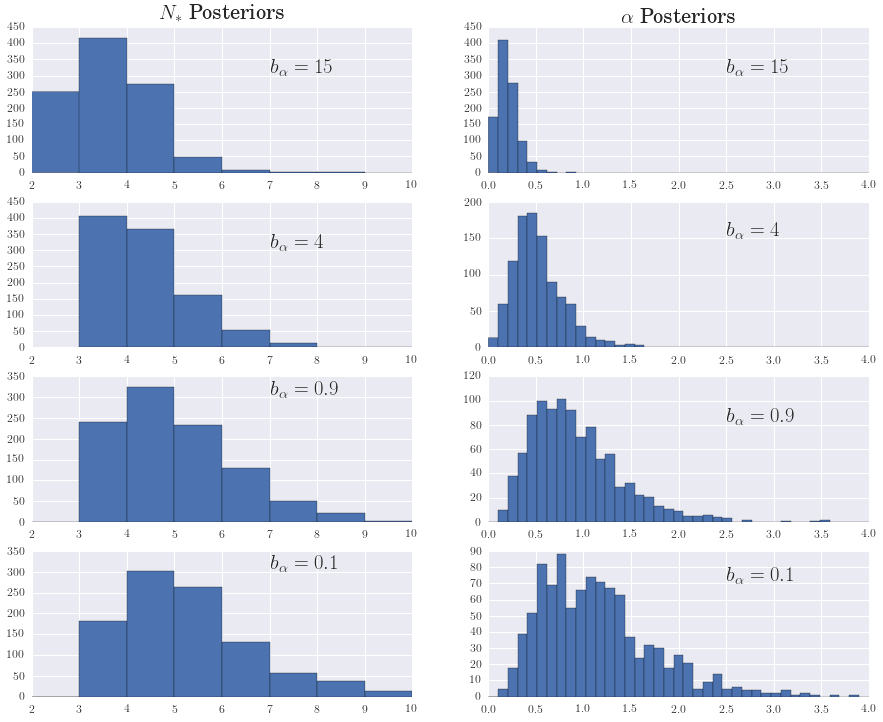

In [541]:
fig,ax = plt.subplots(4,2,figsize=(15,12))
ax[0,0].set_title(r'$N_*$ Posteriors',size='xx-large')
ax[0,1].set_title(r'$\alpha$ Posteriors',size='xx-large')
ax[0,0].hist(dpm_a_alpha_2_b_alpha_15.n_star_arr[500:],bins=np.linspace(2,10,9))
ax[0,1].hist(dpm_a_alpha_2_b_alpha_15.alpha_arr[500:],bins=np.linspace(0,4,40))
ax[1,0].hist(dpm_a_alpha_2_b_alpha_4.n_star_arr[500:],bins=np.linspace(2,10,9))
ax[1,1].hist(dpm_a_alpha_2_b_alpha_4.alpha_arr[500:],bins=np.linspace(0,4,40))
ax[2,0].hist(dpm_a_alpha_2_b_alpha_09.n_star_arr[500:],bins=np.linspace(2,10,9))
ax[2,1].hist(dpm_a_alpha_2_b_alpha_09.alpha_arr[500:],bins=np.linspace(0,4,40))
ax[3,0].hist(dpm_a_alpha_2_b_alpha_01.n_star_arr[500:],bins=np.linspace(2,10,9))
foo = ax[3,1].hist(dpm_a_alpha_2_b_alpha_01.alpha_arr[500:],bins=np.linspace(0,4,40))

ax[0,0].text(7,300,r'$b_{\alpha} = 15$',size='xx-large')
ax[0,1].text(2.5,300,r'$b_{\alpha} = 15$',size='xx-large')
ax[1,0].text(7,300,r'$b_{\alpha} = 4$',size='xx-large')
ax[1,1].text(2.5,150,r'$b_{\alpha} = 4$',size='xx-large')
ax[2,0].text(7,300,r'$b_{\alpha} = 0.9$',size='xx-large')
ax[2,1].text(2.5,80,r'$b_{\alpha} = 0.9$',size='xx-large')
ax[3,0].text(7,300,r'$b_{\alpha} = 0.1$',size='xx-large')
foo = ax[3,1].text(2.5,70,r'$b_{\alpha} = 0.1$',size='xx-large')

I also include some plots of the posterior density distributions, $P(y_0|data)$. As we increase the expected number of clusters, the more smaller features in the distribution pop out (although there isn't much noticable difference between the final two, suggesting we're getting enough differentiation already). Clearly we can only get distributions with two clusters for the model with $b_{\alpha}=4$.

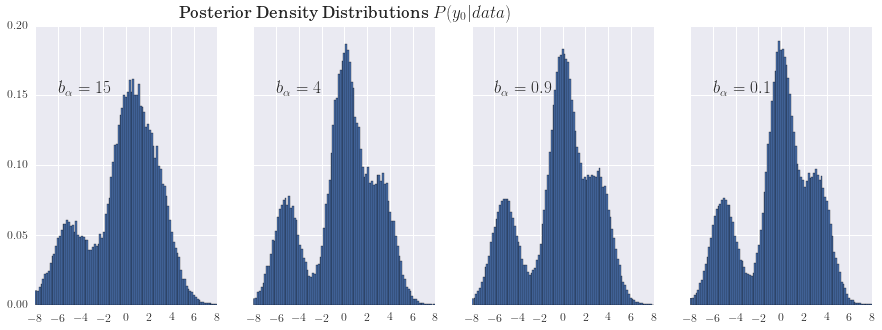

In [848]:
fig,ax = plt.subplots(1,4,figsize=(15,5),sharey=True)
ax[0].hist(samples_a_alpha_2_b_alpha_15.ravel(),bins=np.linspace(-8,8,100),normed=1)
ax[1].hist(samples_a_alpha_2_b_alpha_4.ravel(),bins=np.linspace(-8,8,100),normed=1)
ax[2].hist(samples_a_alpha_2_b_alpha_09[0].ravel(),bins=np.linspace(-8,8,100),normed=1)
foo = ax[3].hist(samples_a_alpha_2_b_alpha_01[0].ravel(),bins=np.linspace(-8,8,100),normed=1)

ax[1].set_title(r'Posterior Density Distributions $P(y_0|data)$',size='xx-large')

ax[0].text(-6,0.15,r'$b_{\alpha} = 15$',size='xx-large')
ax[1].text(-6,0.15,r'$b_{\alpha} = 4$',size='xx-large')
ax[2].text(-6,0.15,r'$b_{\alpha} = 0.9$',size='xx-large')
ax[3].text(-6,0.15,r'$b_{\alpha} = 0.1$',size='xx-large')

4.
Illustration of the clustering introduced by the model. The blue histogram corresponds to the 10th percentile of $\theta_i$ for each of the n $\theta_i$, the red to the median, and the green to the 90th precentile. 

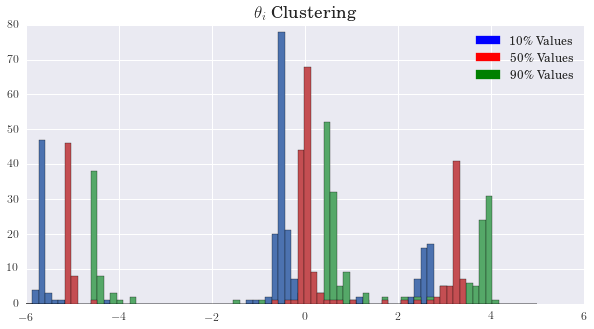

In [551]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title(r'$\theta_i$ Clustering',size='xx-large')
ax.hist(ten_percent,bins=np.linspace(-6,5,80))
ax.hist(ninety_percent,bins=np.linspace(-6,5,80))
foo = ax.hist(meds,bins=np.linspace(-6,5,80))
blue_patch = mpatches.Patch(color='blue', label='10\% Values')
red_patch = mpatches.Patch(color='red', label='50\% Values')
green_patch = mpatches.Patch(color='green', label='90\% Values')

ax.legend(handles=[blue_patch,red_patch,green_patch],prop={'size':12})

5.
Once the MCMC sampling is performed, the posterior predictive inference is straightforward to draw. Essentially we just sample $\theta_i$ from the Polya urn distribution given the other parameters from the MCMC sampling, then draw $y_i$ values from the parameterized kernels. An example of a realization is below.

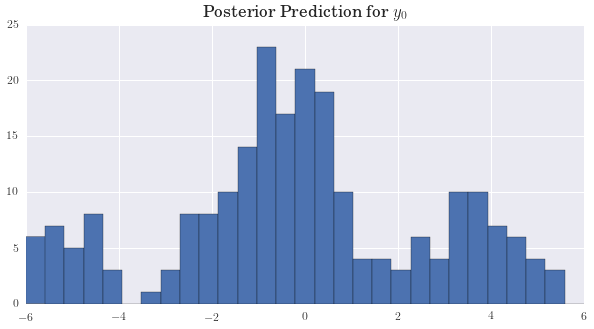

In [570]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Posterior Prediction for $y_0$',size='xx-large')
f00 = ax.hist(post_samples[4,:],bins=np.linspace(-6,6,30))

In [811]:
data = np.loadtxt('hwk2-data.txt')

In [481]:
#dpm_a_alpha_2_b_alpha_15 = DPM(data=data,a_alpha=2.,b_alpha=15.)
dpm_a_alpha_2_b_alpha_15.mcmc_step(n_steps=1000)

### Question 3

In this problem, we are considering a Poisson regression mode, with a few extensions. At the simplest, we can write the model as
$$
y_i~\sim~\rm{Poisson}(\theta\exp(\beta~x_i)), \\
\theta\sim \rm{Gamma}(\phi,\phi\mu^{-1}),~\beta\sim N(a_{\beta},\tau^2_{\beta}),
$$
where we have assumed $\theta$ follows a gamma distribution with hyperparameters $a_{\theta}$ and $b_{\theta}$ and $\beta$ follows a normal distrbution with hyperparameters $a_{\beta}$ and $\tau^2_{\beta}$. The gamma distirbution is conjugate for $\theta$, while the normal distribution for beta allows for a simple Metropolis sampling. 

We can also expand the model to account for over-dispersion, allowing the $\theta$'s to vary for each data point and adding an additional prior distribution for $\theta$:
$$
y_i~\sim~\rm{Poisson}(\theta_i\exp(\beta~x_i)), \\
\theta_i\sim \rm{Gamma}(\phi,\phi\mu^{-1}),~\beta\sim N(a_{\beta},\tau^2_{\beta}), .
$$
Now the $\theta_i$ are each drawn individually for each data point. 

A compromise between these models is to use a DP mixture on the $\theta$'s, allowing the model to select as many different $\theta$ clusters as is necessary to correctly fit the data. We specify this model as
$$
y_i~\sim~\rm{Poisson}(\theta_i\exp(\beta~x_i)), \theta\sim\rm{DP}(\alpha,G_0),\\
G_0\sim \rm{Gamma}(\phi,\phi\mu^{-1}),\\
\alpha~\sim~\rm{Gamma}(a_{\alpha},b_{\alpha}),~\beta\sim N(a_{\beta},\tau^2_{\beta}),~\mu~\sim~\rm{Gamma}(a_{\mu},
b_{\mu}),~\phi\sim~\rm{Gamma}(a_{\phi},b_{\phi}).
$$

I coded this model using the marginal sampling method, similar to above. Sampling for the $\theta_i$ values proceeds essentially identically, once one calculates the $g_0$ and $h(\theta | -)$ quantities, which are made easy due to the conjugacy. Sampling from $\alpha$ is also unchanged from the above. 

There is no good conjugate distribution for the $\beta$ parameter, so I just chose to parameterize this as a normal distribution with mean zero and assumed a fairly large width. I also just assumed Gamma distribution priors for the $\mu$ and $\phi$ parameters for conveinence. I sampled all three of these using a simple Metropolis algorithm with a normal distrbution as the proposal, proposing on the log of $\mu$ and $\phi$. After tuning the sampler slightly, I found this produced reasonable inference for the model.

Below, I plot the actual observed data against one posterior simulation to illustrate the semi-parametric model. This is at least a check that the model isn't doing anything too crazy (although I did pick a simulation that looked especially like the data for purposes of this illustration...). 

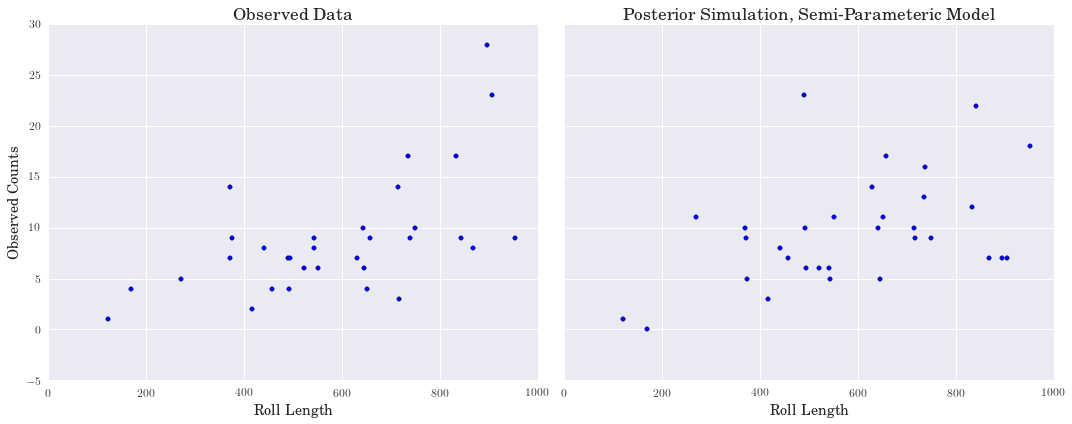

In [676]:
fig,ax = plt.subplots(1,2,figsize=(15,6),sharey=True)
ax[0].scatter(data[:,0],data[:,1])
ax[0].set_title('Observed Data',size='xx-large')
ax[0].set_ylabel('Observed Counts',size='x-large')
ax[0].set_xlabel('Roll Length',size='x-large')
ax[1].set_title('Posterior Simulation, Semi-Parameteric Model',size='xx-large')
ax[1].set_xlabel('Roll Length',size='x-large')
ax[1].scatter(data[:,0],samples[70,:])
fig.tight_layout()

I also provide histograms of some of the various regression parameters in the model:

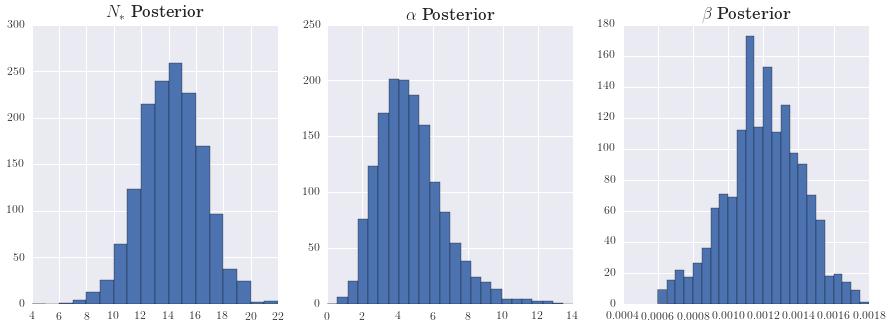

In [688]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title(r'$N_*$ Posterior',size='xx-large')
ax[1].set_title(r'$\alpha$ Posterior',size='xx-large')
ax[2].set_title(r'$\beta$ Posterior',size='xx-large')
ax[0].hist(dp_poi.n_star_arr[1500:],bins=np.linspace(4,22,19))
ax[1].hist(dp_poi.alpha_arr[1500:],bins=np.linspace(0,14,25))
foo = ax[2].hist(dp_poi.beta_arr[1500:],bins=np.linspace(0.0006,0.0018,25))

For model checking, I looked at the Gelfand and Ghosh 1998 criterion,
$$
D_k(M) = P(M) + \frac{k}{(k+1)} G(M),
$$
where P(M) is the penalty term corresponding to the summed variance of a series of simulated $y_i,n$ values and G(M) is a goodness-of-fit term.

I compared the semi-parametric model to the fully-pooled model, i.e. that involving a single $\theta$ for all observations. I actually found that the fully-pooled model beat the semi-parametric model in both respects. I consistently found values around 420 for the criterion for the fully pooled model, while the semi-parametric model was typically around 511 for $k=1$. The fully pooled model actually performed better both in the penalty term and the goodness-of-fit. Since this is inconsistent with what we mentioned in class (and indeed isn't very logical; we'd expect the semi-parametric model to fit the data very well at the cost of penalty), this probably indicates an error in my code somewhere. However, I was unable to find it in time.

I also wasn't able to get the fully non-pooled model written and working in time, i.e. the model with each datapoint receivin its own $\theta_i$. 

I included some posteriors for the pooled model. It is clear that the non-pooled model puts more emphasis on the linear trend, favoring a larger value of $\beta$.

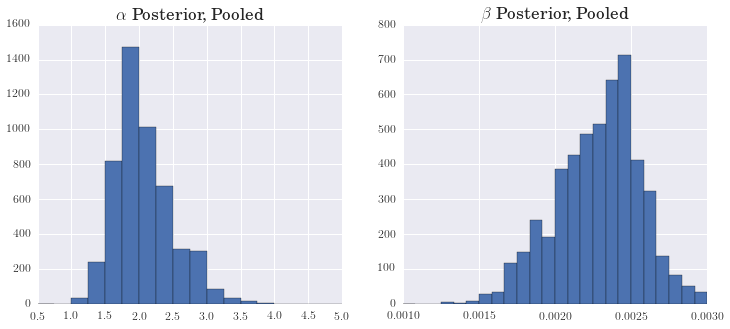

In [783]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title(r'$\alpha$ Posterior, Pooled',size='xx-large')
ax[1].set_title(r'$\beta$ Posterior, Pooled',size='xx-large')
ax[0].hist(dp_poi_single.theta_arr[5000:],bins=np.linspace(0.5,5,19))
foo = ax[1].hist(dp_poi_single.beta_arr[5000:],bins=np.linspace(0.001,0.003,25))

In [623]:
data = np.loadtxt('fabric_data.dat')

### Problem 2

Problem two presents a simple extension of the first problem, where now we are allowing the variances of each kernel to vary from data point to data point. I evaluated this model using the PDdensity package in R, then brought the data back over to Python for analysis. I honestly didn't play around too much with hyperprior specification (this was my first time using R, so I found it cumbersome to play around with the DPdensity package), but just from trying a few different values for hyperpriors, the effect seemed to be similar to problem one. As long as the prior distributions were left reasonably wide, the data were able to influence the inferences correctly. 

Comparing the distributions by eye, 

In [860]:
r_data = np.loadtxt('r_output.dat')

r_thetas = r_data[:,1]
r_sigmas = r_data[:,2]

n_draws = 200
y_r = np.zeros((r_thetas.size,n_draws))
for i in range(n_draws):
    y_r[:,i] = np.random.normal(loc=r_thetas,scale=r_sigmas)

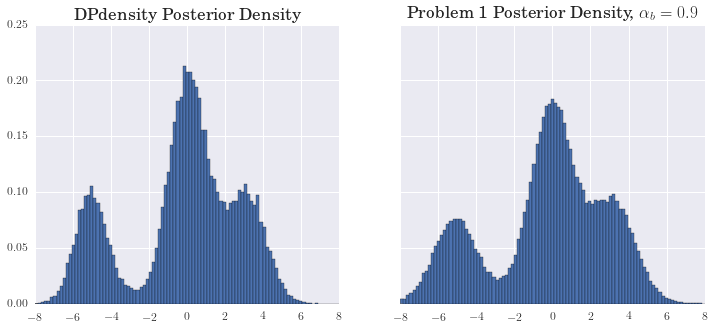

In [866]:
fig,ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
ax[0].hist(y_r.ravel(),normed=1,bins=np.linspace(-8,8,100))
ax[1].hist(samples_a_alpha_2_b_alpha_09[0].ravel(),bins=np.linspace(-8,8,100),normed=1)

ax[0].set_title('DPdensity Posterior Density',size='xx-large')
foo = ax[1].set_title(r'Problem 1 Posterior Density, $\alpha_b=0.9$',size='xx-large')

In [877]:
def calc_stats_r(y_r):
    median = []
    percent_95 = [] 
    percent_05 = []
    
    for i in range(len(y_r[0,:])):
        median.append(np.median(y_r[:,i]))
        percent_95.append(np.percentile(y_r[:,i],95))
        percent_05.append(np.percentile(y_r[:,i],05))
        
    return median,percent_95,percent_05

In [883]:
r_med,r_95,r_05 = calc_stats_r(y_r)
py_med,py_95,py_05 = calc_stats_r(samples_a_alpha_2_b_alpha_09[0])

Below, I compare inferences for certain statistics between the DPmixture inferred location-scale normal and the location normal I coded myself. Specifically, I consider the location of the 5 percentile, the median, and the 95 percentile. I plot the location-scale normal in blue and the location-normal in green. It is clear that by neglecting to vary the scale from data point to data point, we naturally infer a larger spread for the distribution than if we allow this.

The vertical lines correspond to the locations of these statistics for the actual data. Interestingly, it is not obvious which distribution is doing a better job of matching the real data (I neglected to calculate posterior p-values, but clearly they would not be very different between the two). While I would have expected the model with more free parameters to better match the data, for the three statistics I've selected, that may not be the case (although it could be that we're within the regime where even the small sensitivity to priors is throwing off the analysis).

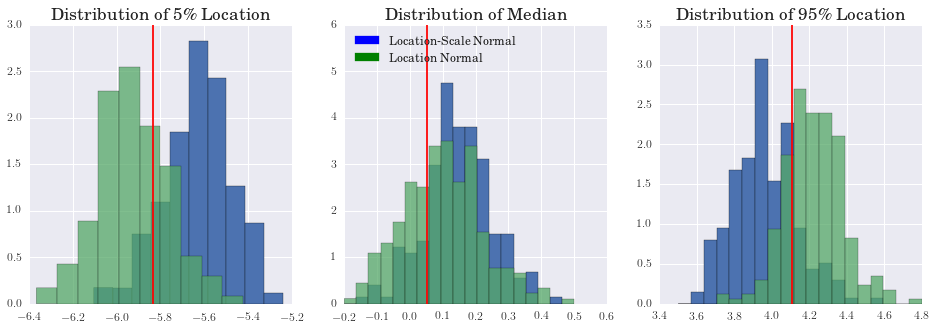

In [922]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].hist(r_05,normed=1,alpha=1)
ax[0].hist(py_05,normed=1,alpha=0.75)
ax[0].set_title(r'Distribution of 5\% Location',size='xx-large')

ax[1].hist(r_med,bins=np.linspace(-0.2,0.5,20),normed=1,alpha=1)
ax[1].hist(py_med,np.linspace(-0.2,0.5,20),normed=1,alpha=0.75)
ax[1].set_title(r'Distribution of Median',size='xx-large')

ax[2].hist(r_95,normed=1,alpha=1,bins=np.linspace(3.5,4.8,20))
ax[2].hist(py_95,normed=1,alpha=0.75,bins=np.linspace(3.5,4.8,20))
foo = ax[2].set_title(r'Distribution of 95\% Location',size='xx-large')

blue_patch = mpatches.Patch(color='blue', label='Location-Scale Normal')
green_patch = mpatches.Patch(color='green', label='Location Normal')

foo = ax[1].legend(loc='upper left',handles=[blue_patch,green_patch],prop={'size':12})
foo = ax[1].set_ylim(0.0,6.0)

ax[0].axvline(-5.8336024999999996,color='red')
ax[1].axvline(0.052249099999999993,color='red')
ax[2].axvline(4.10653,color='red')

In [921]:
class_data = np.loadtxt('hwk2-data.txt')
np.median(class_data)

0.052249099999999993

In [780]:
dp_poi_single = DPMPoisson()
dp_poi_single.mcmc_step_single(n_steps=10000)
single_samples = dp_poi_single.draw_post_single(2500,5000)

Beta steps accepted:3222
Theta steps accepted:3403


In [781]:
crit_single,p_single,g_single = dp_poi_single.model_check(single_samples,1)
print crit_single,p_single,g_single

418.796696188 94.859071868 647.87524864


In [776]:
dp_poi = DPMPoisson()
dp_poi.mcmc_step(n_steps=5000)

Beta steps accepted:2290
Mu steps accepted:2480
Phi steps accepted:3072


In [777]:
samples = dp_poi.draw_post(2500,2500)
crit,p,g = dp_poi.model_check(samples,1)
print crit,p,g

511.367467266 148.118244866 726.4984448


In [4]:
class DPMPoisson(object):
    '''
    Object to perform inference for Dirichlet Process Mixtures.
    
    Specific to poisson distribution
    '''
    def __init__(self,kernel='poisson',data=None,data_file='fabric_data.dat',inf_type=None):
        self.kernel = kernel
        
        #set the priors for the hyperparameters
        self.a_phi = 2.
        self.b_phi = 1.
        self.a_mu = 1.
        self.b_mu = 1.
        self.a_beta = 0.
        self.tau_sq_beta = 1.
        self.a_alpha = 1.
        self.b_alpha = 1.
        
        self.inf_type = inf_type
        
        #create the list to hold MCMC steps
        self.samples = []
        
        if data is None:
            self.data = np.loadtxt(data_file)
            
        else:
            self.data = data
            
        self.beta_accept = 0
        self.mu_accept = 0
        self.phi_accept = 0
            
        self.x = self.data[:,0]
        self.y = self.data[:,1]
        
        #create the initial parameter distributions
        self.init_pos()
        
        
    def init_pos(self):
        '''
        Create the initial parameter distribution
        '''
        self.pos = dict()
        theta_j = np.array([1.])
        probs = np.array([1.])
        self.pos['theta'] = np.random.choice(theta_j,p=probs,size=len(self.x))
        self.pos['phi'] = 1.
        self.pos['alpha'] = 3.
        self.pos['tau_sq'] = 1.
        self.pos['mu'] = 0.5
        self.pos['beta'] = 0.002
        #self.pos['l'] = np.zeros(size=len(self.x))
        #self.pos['z'] = np.zeros(size=len(self.x))        
        self.theta_arr = np.array(self.pos['theta'])
        self.phi_arr = np.array(self.pos['phi'])
        self.alpha_arr = np.array(self.pos['alpha'])
        self.tau_sq_arr = np.array(self.pos['tau_sq'])
        self.mu_arr = np.array(self.pos['mu'])
        self.beta_arr = np.array(self.pos['beta'])        
        self.n_star_arr = np.array(np.unique(self.theta_arr).size)
        
    def mcmc_step_single(self,n_steps=1):
        '''
        Take n_steps of the sampler for the single theta case
        '''
        self.beta_accept = 0
        self.theta_accept = 0

        self.theta_arr = np.array([2.5])
        self.pos['theta'] = self.theta_arr
        for i in range(n_steps):
            self.sample_theta_single()
            self.sample_beta_single()
            
            self.theta_arr = np.append(self.theta_arr,self.pos['theta'])
            self.beta_arr = np.append(self.beta_arr,self.pos['beta'])
            
        print 'Beta steps accepted:' + str(self.beta_accept)        
        print 'Theta steps accepted:' + str(self.theta_accept)        

    
    def mcmc_step(self,n_steps=1):
        '''
        Take n_steps of the sampler. 
        '''
        self.beta_accept = 0
        self.mu_accept = 0
        self.phi_accept = 0
        for i in range(n_steps):
            
            if self.inf_type=='full':
                self.sample_theta_full()
            else:
                self.sample_theta()
            self.sample_phi()
            self.sample_mu()
            self.sample_alpha()
            self.sample_beta()
            
            self.theta_arr = np.vstack([self.theta_arr,self.pos['theta']])
            self.phi_arr = np.append(self.phi_arr,self.pos['phi'])
            self.mu_arr = np.append(self.mu_arr,self.pos['mu'])
            self.alpha_arr = np.append(self.alpha_arr,self.pos['alpha'])
            self.beta_arr = np.append(self.beta_arr,self.pos['beta'])            
            self.n_star_arr = np.append(self.n_star_arr,np.unique(self.pos['theta']).size)

        print 'Beta steps accepted:' + str(self.beta_accept)        
        print 'Mu steps accepted:' + str(self.mu_accept)        
        print 'Phi steps accepted:' + str(self.phi_accept)        

    def sample_theta_single(self,ret=False,a=0.2):
        '''
        Draw a sample for the single theta (i.e. pooled) case.
        '''
        beta = self.pos['beta']
        theta = self.pos['theta']
        phi = self.pos['phi']
        mu = self.pos['mu']
        
        ln_like_theta = np.log(theta)*np.sum(self.y) - theta*np.sum(np.exp(beta*self.x)) + \
            stats.gamma.logpdf(theta,phi,scale=1./(phi/mu)) - np.log(theta)
                
        ln_prop = stats.norm.rvs(loc=np.log(theta),scale=a)
        
        prop = np.exp(ln_prop)
        
        ln_like_prop = np.log(prop)*np.sum(self.y) - prop*np.sum(np.exp(beta*self.x)) + \
            stats.gamma.logpdf(prop,phi,scale=1./(phi/mu)) - np.log(prop)
            
        #calculate acceptance chance for beta
        accept = np.exp(ln_like_prop - ln_like_theta)
        check_accept = stats.uniform.rvs()

        if accept > check_accept:
            self.pos['theta'] = prop
            self.theta_accept += 1
        
    def sample_beta_single(self,ret=False,a=0.0003):
        '''
        Draw a value for beta for the single theta case, using Metropolis step.
        '''
        beta = self.pos['beta']
        theta = self.pos['theta']
        
        ln_like_beta = np.sum(self.y * beta * self.x) - theta*np.sum(np.exp(beta*self.x)) + \
            stats.norm.logpdf(beta,loc=self.a_beta,scale=np.sqrt(self.tau_sq_beta))
        
        prop = stats.norm.rvs(loc=beta,scale=a)
        
        ln_like_prop = np.sum(self.y * prop * self.x) - theta*np.sum(np.exp(prop*self.x)) + \
            stats.norm.logpdf(prop,loc=self.a_beta,scale=np.sqrt(self.tau_sq_beta))
            
        #calculate acceptance chance for beta
        accept = np.exp(ln_like_prop - ln_like_beta)
        check_accept = stats.uniform.rvs()

        if accept > check_accept:
            self.pos['beta'] = prop
            self.beta_accept += 1
        
    def sample_theta_full(self,ret=False):
        '''
        Draw a sample for the entire theta vector, not binning.
        '''
        phi = self.pos['phi']
        mu = self.pos['mu']
        
        self.pos['theta'] = np.random.gamma(phi + self.y,1. + 1./(phi/mu))
        
    def draw_post_full(self,n_draws,n_burn):
        '''
        Draw a posterior sample for the entire theta vector.
        '''
        sample_grid = np.zeros((n_draws,self.x.size))

        for i in range(n_draws):
            theta = self.theta_arr[n_burn+i]
            beta = self.beta_arr[n_burn+i]
            lam = theta * np.exp(self.x * beta)
            sample_grid[i,:] = np.random.poisson(lam=lam)
            
    def sample_theta(self,ret=False):
        '''
        Do a sample of the full theta vector, one by one.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        alpha = self.pos['alpha']
        phi = self.pos['phi']
        tau_sq = self.pos['tau_sq']
        mu = self.pos['mu']
        beta = self.pos['beta']
        
        #calculate the normalization constant q_0        
        for i in range(len(theta)):
            theta_i = theta[i]
            mask = np.ones(len(theta),dtype=bool)
            mask[i] = False
            theta_minus = theta[mask]
            
            y_i = self.y[i]
            x_i = self.x[i]
            
            theta_j,w,n_j = np.unique(theta_minus,return_counts=True,return_inverse=True)
            
            #calculate the q_j vector density
            q_j = self.calc_q_j(y_i,x_i,theta_j,beta)
            
            #calculate probabilities and normalization constants
            #for point mass draws
            q_0 = self.calc_q_0(y_i,phi,mu,x_i,beta)
            new_prob = alpha*q_0
            cluster_probs = n_j * q_j

            self.cluster_probs = cluster_probs
            norm = new_prob + np.sum(cluster_probs)
            probs = np.append(cluster_probs,new_prob)/norm
            
            #draw a choice for the point mass
            cluster = np.argmin(np.abs(np.random.multinomial(1,probs) -1.))
            if cluster > len(theta_j)-1:
                new_theta = self.draw_new_theta(y_i,phi,mu)
                
            else:
                new_theta = theta_j[cluster]
                            
            theta[i] = new_theta
            
        self.pos['theta'] = theta
        
        if ret:
            return theta
        
    def calc_q_0(self,y_i,phi,mu,x_i,beta):
        '''
        Calculate the normalization of the theta, normal with normal prior assumed.
        '''
        if self.kernel == 'poisson':
            return self.x.size / np.exp(x_i * beta) / gamma(y_i+phi) * (1.+phi/mu)**(y_i+phi)
        
        
    def draw_new_theta(self,y_i,phi,mu):
        '''
        New theta will be a draw from a gamma distribution
        '''
    
        return stats.gamma.rvs(y_i+phi,scale=1./(1.+phi/mu))
    
    def calc_q_j(self,y_i,x_i,theta_j,beta):
        '''
        Calculate the density of the kernel.
        '''
        if self.kernel == 'poisson':
            return stats.poisson.pmf(y_i,np.exp(x_i * beta)*theta_j)
            
        
    def sample_mu(self,ret=False,a=0.3):
        '''
        Draw a sample from mu, assuming gamma prior on mu.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        mu = self.pos['mu']
        phi = self.pos['phi']
        theta_j,n_j = np.unique(theta,return_counts=True)

        ln_like = stats.gamma.logpdf(mu,self.a_mu,scale=1./self.b_mu) + \
            np.sum(stats.gamma.logpdf(theta_j,phi,scale=1./(phi/mu))) - np.log(mu)
        #posterior for phi is given by an inverse gamma distribution
        
        ln_prop = stats.norm.rvs(loc=np.log(mu),scale=a)
        prop = np.exp(ln_prop)
        ln_like_prop = stats.gamma.logpdf(prop,self.a_mu,scale=1./self.b_mu) + \
            np.sum(stats.gamma.logpdf(theta_j,phi,scale=1./(phi/prop))) - np.log(prop)
            
        #calculate acceptance chance for beta
        accept = np.exp(ln_like_prop - ln_like)
        check_accept = stats.uniform.rvs()

        if accept > check_accept:
            self.pos['mu'] = prop
            self.mu_accept += 1
            
            if ret:
                return prop
        
        else:
            if ret:
                return mu
            
    def sample_phi(self,ret=False,a=0.5):
        '''
        Draw a sample from mu, assuming gamma prior on mu.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        mu = self.pos['mu']
        phi = self.pos['phi']
        theta_j,n_j = np.unique(theta,return_counts=True)

        ln_like = stats.gamma.logpdf(phi,self.a_phi,scale=1./self.b_phi) + \
            np.sum(stats.gamma.logpdf(theta_j,phi,scale=1./(phi/mu))) - np.log(phi)
        #posterior for phi is given by an inverse gamma distribution
        
        ln_prop = stats.norm.rvs(loc=np.log(phi),scale=a)
        prop = np.exp(ln_prop)
        ln_like_prop = stats.gamma.logpdf(prop,self.a_phi,scale=1./self.b_phi) + \
            np.sum(stats.gamma.logpdf(theta_j,prop,scale=1./(prop/mu))) - np.log(prop)
            
        #calculate acceptance chance for beta
        accept = np.exp(ln_like_prop - ln_like)
        check_accept = stats.uniform.rvs()

        if accept > check_accept:
            self.pos['phi'] = prop
            self.phi_accept += 1
            
            if ret:
                return prop
        
        else:
            if ret:
                return phi

        
    def sample_beta(self,ret=False,a=0.0002):
        '''
        Draw a sample for beta. Done using a metropolis step.
        
        a = stddev of metropolis sampler
        '''
        beta = self.pos['beta']
        theta = self.pos['theta']
        lamb = theta * np.exp(beta * self.x)
        ln_like = -1. * np.sum(lamb) + np.sum(self.y * np.log(lamb)) + \
            stats.norm.logpdf(beta,loc=self.a_beta,scale=np.sqrt(self.tau_sq_beta))
            
        #draw new proposal for beta
        prop = stats.norm.rvs(loc=beta,scale=a)
        lamb_prop = theta * np.exp(prop * self.x)
        
        #calculate likelihood for beta
        ln_like_prop = -1. * np.sum(lamb_prop) + np.sum(self.y * np.log(lamb_prop)) + \
            stats.norm.logpdf(prop,loc=self.a_beta,scale=np.sqrt(self.tau_sq_beta))
            
        #calculate acceptance chance for beta
        accept = np.exp(ln_like_prop - ln_like)
        check_accept = stats.uniform.rvs()

        if accept > check_accept:
            self.pos['beta'] = prop
            self.beta_accept += 1
            
            if ret:
                return prop
        
        else:
            if ret:
                return beta
    
    def sample_alpha(self,ret=False):
        '''
        Sample from the posterior of alpha, using the data augmentation strategy discusssed
        in class. 
        '''
        theta = self.pos['theta']
        alpha = self.pos['alpha']
        theta_j,n_j = np.unique(theta,return_counts=True)
        n = self.x.size
        n_star = len(theta_j)
        eta = stats.beta.rvs(1. + alpha,n)
        epsilon = (self.a_alpha * n_star -1.) / (n * (self.b_alpha - np.log(eta)) + n_star + self.a_alpha -1.)
        
        u = stats.uniform.rvs()
        if u < epsilon:
            self.pos['alpha'] = stats.gamma.rvs(self.a_alpha + n_star,scale=1./(self.b_alpha - np.log(eta)))
            
        else:
            self.pos['alpha'] = stats.gamma.rvs(self.a_alpha + n_star -1.,scale=1./(self.b_alpha - np.log(eta)))
            
        if ret:
            return self.pos['alpha']
        
    def draw_post(self,n_draws,n_burn):
        '''
        Draw posterior samples from the MCMC samples. 
        
        N_draws can't be more than the number
        of MCMC samples that have been drawn minus the number of burn steps requested.
        '''
        sample_grid = np.zeros((n_draws,self.x.size))
        
        #loop over the desired number of samples
        for i in range(n_draws):
            theta = self.theta_arr[n_burn+i,:]
            alpha = self.alpha_arr[n_burn+i]
            n = self.x.size
            phi = self.phi_arr[n_burn+i]
            mu = self.mu_arr[n_burn+i]
            beta = self.beta_arr[n_burn+i]
            #tau_sq = self.tau_sq_arr[n_burn+i]
            
            #draw out the grouped values of theta
            theta_j,n_j = np.unique(theta,return_counts=True)

            norm = alpha + n
            probs = np.concatenate([n_j,[alpha]]) / norm
            new_theta = np.zeros(theta.shape)
            
            
            #loop over values of theta to make selections
            #this could be coded much quicker, if it takes too long
            for j in range(theta.size):
                cluster = np.argmin(np.abs(np.random.multinomial(1,probs) -1.))

                if cluster > len(theta_j)-1:
                    new_theta[j] = stats.gamma.rvs(phi,scale=1./(phi/mu))
                
                else:
                    new_theta[j] = theta_j[cluster]
                    
            lamb = new_theta * np.exp(self.x * beta)
            sample_grid[i,:] = np.random.poisson(lam=lamb)
            
        return sample_grid
    
    def draw_post_single(self,n_draws,n_burn):
        '''
        Draw posterior simulations for the single data case
        '''
        sample_grid = np.zeros((n_draws,self.x.size))
        for i in range(n_draws):
            theta = self.theta_arr[n_burn+i]
            beta = self.beta_arr[n_burn+i]
            
            sample_grid[i,:] = np.random.poisson(lam=theta*np.exp(self.x*beta))
        
        return sample_grid
    
    def model_check(self,sample_grid,k):
        '''
        Calculate the Galfand & Gosh criterion for a given sample grid.
        '''
        var = np.zeros(sample_grid[0,:].size)
        mean = np.zeros(sample_grid[0,:].size)
        
        for i in range(sample_grid[0,:].size):
            var[i] = np.var(sample_grid[:,i])
            mean[i] = np.mean(sample_grid[:,i])
        
        p = np.sum(var)
        g = np.sum((self.y - mean)**2)
        
        criterion = p + (k/(k+1.))*g
        return criterion,p,g
        

In [5]:
class DPM(object):
    '''
    Object to perform inference for Dirichlet Process Mixtures.
    
    
    '''
    def __init__(self,kernel='normal',data=None,data_file='hwk2-data.txt',
                a_phi=1.,b_phi=1.,a_mu=1.,b_mu=1.,a_tau_sq=7.,b_tau_sq=7.,
                a_alpha=1.,b_alpha=1.):
        self.kernel = kernel
        
        #set the priors for the hyperparameters
        self.a_phi = a_phi
        self.b_phi = b_phi
        self.a_mu = a_mu
        self.b_mu = b_mu
        self.a_tau_sq = a_tau_sq
        self.b_tau_sq = b_tau_sq
        self.a_alpha = a_alpha
        self.b_alpha = b_alpha
        
        #create the initial parameter distributions
        self.init_pos()
        
        #create the list to hold MCMC steps
        self.samples = []
        
        if data is None:
            self.data = np.loadtxt(data_file)
            
        else:
            self.data = data
        
    def init_pos(self):
        '''
        Create the initial parameter distribution
        '''
        self.pos = dict()
        theta_j = np.array([-5.,0.,3.5])
        probs = np.array([0.2,0.5,0.3])
        self.pos['theta'] = np.random.choice(theta_j,p=probs,size=len(data))
        self.pos['phi'] = 1.
        self.pos['alpha'] = 2.5
        self.pos['tau_sq'] = 3.
        self.pos['mu'] = 1.
        
        self.theta_arr = np.array(self.pos['theta'])
        self.phi_arr = np.array(self.pos['phi'])
        self.alpha_arr = np.array(self.pos['alpha'])
        self.tau_sq_arr = np.array(self.pos['tau_sq'])
        self.mu_arr = np.array(self.pos['mu'])
        self.n_star_arr = np.array(np.unique(self.theta_arr).size)

    
    def mcmc_step(self,n_steps=1):
        '''
        Take n_steps of the sampler. 
        '''
        for i in range(n_steps):
            self.sample_theta()
            self.sample_phi()
            self.sample_tau_sq()
            self.sample_mu()
            self.sample_alpha()
            self.theta_mixer()
            
            self.theta_arr = np.vstack([self.theta_arr,self.pos['theta']])
            self.phi_arr = np.append(self.phi_arr,self.pos['phi'])
            self.tau_sq_arr = np.append(self.tau_sq_arr,self.pos['tau_sq'])
            self.mu_arr = np.append(self.mu_arr,self.pos['mu'])
            self.alpha_arr = np.append(self.alpha_arr,self.pos['alpha'])
            self.n_star_arr = np.append(self.n_star_arr,np.unique(self.pos['theta']).size)

            
    def sample_theta(self,ret=False):
        '''
        Do a sample of the full theta vector, one by one.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        alpha = self.pos['alpha']
        phi = self.pos['phi']
        tau_sq = self.pos['tau_sq']
        mu = self.pos['mu']
        
        #calculate the normalization constant q_0
        q_0 = self.calc_q_0(phi,tau_sq)
        
        for i in range(len(theta)):
            theta_i = theta[i]
            mask = np.ones(len(theta),dtype=bool)
            mask[i] = False
            theta_minus = theta[mask]
            
            theta_j,w,n_j = np.unique(theta_minus,return_counts=True,return_inverse=True)
            
            #calculate the q_j vector density
            q_j = self.calc_q_j(self.data[i],theta_j,phi)
            
            #calculate probabilities and normalization constants
            #for point mass draws
            new_prob = alpha*q_0
            cluster_probs = n_j * q_j
            norm = new_prob + np.sum(cluster_probs)
            probs = np.append(cluster_probs,new_prob)/norm
            
            #draw a choice for the point mass
            cluster = np.argmin(np.abs(np.random.multinomial(1,probs) -1.))
            if cluster > len(theta_j)-1:
                new_theta = self.draw_new_theta(phi,tau_sq,self.data[i],mu)
                
            else:
                new_theta = theta_j[cluster]
                            
            theta[i] = new_theta
            
        self.pos['theta'] = theta
        
        if ret:
            return theta
        
    def calc_q_0(self,phi,tau_sq):
        '''
        Calculate the normalization of the theta, normal with normal prior assumed.
        '''
        if self.kernel == 'normal':
            return np.sqrt((1./(1./tau_sq + self.data.size/phi) / 2. / np.pi))
        
        
    def draw_new_theta(self,phi,tau_sq,y,mu):
        new_sigma = (phi * tau_sq) / (phi +tau_sq)
        mu_new = (1./tau_sq * mu + 1./phi * y)/(1./tau_sq + 1./phi)
    
        return stats.norm.rvs(loc=mu_new,scale=np.sqrt(new_sigma))
    
    def calc_q_j(self,y_i,theta_j,phi):
        '''
        Calculate the density of the kernel.
        '''
        if self.kernel == 'normal':
            return stats.norm.pdf(y_i,loc=theta_j,scale=np.sqrt(phi))
            
    def sample_phi(self,ret=False):
        '''
        Draw a sample from the posterior for phi, given all other parameters.
        Standard conjugate distribution for normal with known mean, unknown variance.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        
        #posterior for phi is given by an inverse gamma distribution
        post_a = self.a_phi + self.data.size/2.
        post_b = self.b_phi + np.sum((self.data - theta)**2)/2.
        self.pos['phi'] = stats.invgamma.rvs(post_a,scale=post_b)
        
        if ret:
            return self.pos['phi']
        
    def sample_mu(self,ret=False):
        '''
        Draw a sample from the posterior for tau_sq, given all other parameters.
        Standard conjugate distribution for normal with unknown mean, known variance. 
        
        Conditions on theta vector, not on data.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        theta_j,n_j = np.unique(theta,return_counts=True)

        tau_sq = self.pos['tau_sq']
        
        #posterior for phi is given by an inverse gamma distribution
        post_var = 1./(1./self.b_mu + len(theta_j)/tau_sq)
        post_mean = (self.a_mu / self.b_mu + np.mean(theta_j)*len(theta_j)/tau_sq) * post_var
        self.pos['mu'] = stats.norm.rvs(loc=post_mean,scale=np.sqrt(post_var))
        
        if ret:
            return self.pos['mu']
        
    def sample_tau_sq(self,ret=False):
        '''
        Draw a sample from the posterior for phi, given all other parameters.
        Standard conjugate distribution for normal with known mean, unknown variance. 
        
        Conditions on theta vector, not on data.
        '''
        #unpack the current parameter vector
        theta = self.pos['theta']
        theta_j,n_j = np.unique(theta,return_counts=True)
        
        tau_sq = self.pos['tau_sq']
        mu = self.pos['mu']
        
        #posterior for phi is given by an inverse gamma distribution
        post_a = self.a_mu + len(theta_j) / 2.
        post_b = self.b_mu + np.sum((theta_j - mu)**2)/2.
        self.pos['tau_sq'] = stats.invgamma.rvs(post_a,scale=post_b)
        
        if ret:
            return self.pos['tau_sq']
        
    def sample_alpha(self,ret=False):
        '''
        Sample from the posterior of alpha, using the data augmentation strategy discusssed
        in class. 
        '''
        theta = self.pos['theta']
        alpha = self.pos['alpha']
        theta_j,n_j = np.unique(theta,return_counts=True)
        n = len(self.data)
        n_star = len(theta_j)
        eta = stats.beta.rvs(1. + alpha,n)
        epsilon = (self.a_alpha * n_star -1.) / (n * (self.b_alpha - np.log(eta)) + n_star + self.a_alpha -1.)
        
        u = stats.uniform.rvs()
        if u < epsilon:
            self.pos['alpha'] = stats.gamma.rvs(self.a_alpha + n_star,scale=1./(self.b_alpha - np.log(eta)))
            
        else:
            self.pos['alpha'] = stats.gamma.rvs(self.a_alpha + n_star -1.,scale=1./(self.b_alpha - np.log(eta)))
            
        if ret:
            return self.pos['alpha']
        
    def theta_mixer(self):
        '''
        Perform the mixing step suggested by West et al. 1994
        '''
        theta = self.pos['theta']
        phi = self.pos['phi']
        tau_sq = self.pos['tau_sq']
        theta_j,w,n_j = np.unique(theta,return_counts=True,return_index=True)

        for i in theta_j:
            w = theta == i
            good_theta = theta[w]
            var = 1./(1./phi + np.sum(w)/tau_sq)
            mean = (i/phi + np.sum(self.data[w])/tau_sq) * var
            new_theta = stats.norm.rvs(loc=mean,scale=np.sqrt(var))
            theta[w] = new_theta
            
        self.pos['theta'] = theta
                    
    def draw_post(self,n_draws,n_burn):
        '''
        Draw posterior samples from the MCMC samples. 
        
        N_draws can't be more than the number
        of MCMC samples that have been drawn minus the number of burn steps requested.
        '''
        sample_grid = np.zeros((n_draws,self.data.size))
        theta_grid = np.zeros((n_draws,self.data.size))

        
        #loop over the desired number of samples
        for i in range(n_draws):
            theta = self.theta_arr[n_burn+i,:]
            alpha = self.alpha_arr[n_burn+i]
            n = self.data.size
            phi = self.phi_arr[n_burn+i]
            mu = self.mu_arr[n_burn+i]
            tau_sq = self.tau_sq_arr[n_burn+i]
            
            #draw out the grouped values of theta
            theta_j,n_j = np.unique(theta,return_counts=True)

            norm = alpha + n
            probs = np.concatenate([n_j,[alpha]]) / norm
            new_theta = np.zeros(theta.shape)
            
            
            #loop over values of theta to make selections
            #this could be coded much quicker, if it takes too long
            for j in range(theta.size):
                cluster = np.argmin(np.abs(np.random.multinomial(1,probs) -1.))

                if cluster > len(theta_j)-1:
                    new_theta[j] = stats.norm.rvs(loc=mu,scale=np.sqrt(tau_sq))
                
                else:
                    new_theta[j] = theta_j[cluster]
                    
            sample_grid[i,:] = np.random.normal(loc=new_theta,scale=np.sqrt(phi))
            theta_grid[i,:] = new_theta
            
        return sample_grid,theta_grid